<a href="https://colab.research.google.com/github/santoshkumarpottumuthu/Sentimental-Analysis-Project/blob/master/Sentimental_Analysis_using_Tweepy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt

In [0]:
def percent(part,whole):
  return 100 * float(part)/float(whole)

In [0]:
#Twitter api keys.
ConsumerKey = "qhfac9zsMmUCa8GkMLOYM21hg"
ConsumerSecret= "PNgSjpiu4rEHO2FkIri4mseCksGvxGFFbb0LluwrBUOhvtsGiI"
Accesstoken = "472099927-B03YMYZ8R88OTnQGIxvEN45mfrg2rNaUJNzP222K"
Access_token_secret = "oE8fAROsHENZzCNfozla6z6t6elgllhU0eeRBBLi2Iovq"

In [0]:
auth = tweepy.OAuthHandler(consumer_key=ConsumerKey,consumer_secret=ConsumerSecret)
auth.set_access_token(Accesstoken,Access_token_secret)
api = tweepy.API(auth)

In [0]:
searchTerm = input("Enter keyword/hashtag to search about:")
numofsearchterms = int(input("Enter how many tweets to analyze"))


Enter keyword/hashtag to search about:italy
Enter how many tweets to analyze8520


In [0]:
tweets = tweepy.Cursor(api.search,q=searchTerm,language ="English").items(numofsearchterms)

In [0]:

negative = 0
neutral =0
polarity = 0

In [0]:
for tweet in tweets:
  #print(tweet.text)
  analysis = TextBlob(tweet.text)
  polarity = analysis.sentiment.polarity
  

TweepError: ignored

In [0]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

positive =0 
if(analysis.sentiment.polarity == 0):
  neutral +=1
elif(analysis.sentiment.polarity < 0.00):
  negative += 1
elif(analysis.sentiment.polarity > 0.00):
    positive += 1

positive = percent(positive , numofsearchterms)
neutral = percent(neutral , numofsearchterms)
negative = percent(negative , numofsearchterms)

positive = format(positive, '.2f')
negative = format(negative, '.2f')
neutral = format(neutral, '.2f')


In [0]:
print("How People are reacting on "+ searchTerm + " by analysing "+ str(numofsearchterms) +" Tweets .")

How People are reacting on italy by analysing 125 Tweets .


In [0]:
if(polarity>0):
  print("Positive")
elif(polarity<0):
  print("Negative")
elif(polarity == 0):
  print("Neutral")

Neutral


In [0]:
labels = ['Positive['+str(positive)+'%]','Negative['+str(negative)+'%]','Neutraal['+str(neutral)+'%]' ]

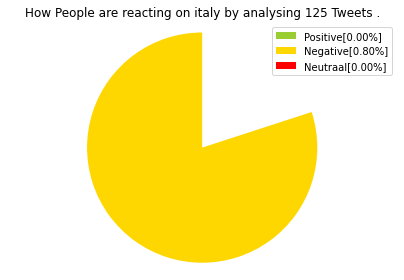

In [0]:
sizes=[positive, negative,neutral]
colors = ['yellowgreen','gold','red']
patches , texts = plt.pie(sizes,colors = colors,startangle=90)
plt.legend(patches,labels,loc = "best")
plt.title("How People are reacting on "+ searchTerm + " by analysing "+ str(numofsearchterms) +" Tweets .")
plt.axis('equal')
plt.tight_layout()
plt.show()